In [ ]:
#Observations
#1. CBS News had by far the most negative sentiments at over -.14. The next most negative was the NYTimes at -.05.
#2. The vast majority of tweets for all of the news outlets were neutral (.82-.88).
#3. Fox News and the BBC had similar positive tweets scores at .72, much higher than the next place NYTimes at .61.

In [1]:
import pandas as pd 
import numpy as np 
import json 
import tweepy 
import time 
import seaborn as sns 
import matplotlib.pyplot as plt 

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
#authenticating 
#twitter API keys 
consumer_key = "kHYzzwyppGdKARIfOxShu2YRS"
consumer_secret = "9qj166MN8wmHa9zl0Zx9zh5epBGqXpnFpteYulVRs0fdbtvHT2"
access_token = "1009234356483715072-MAoWxmMK0xPnNuKnKYehzKwpU1AmEM"
access_token_secret = "Nta70fI2z0q95m5KTpuEMhOOxZQAGlDyc8XQo928bfoFY"

#setup Tweepy API authentication 
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [3]:
#target news sites 
news_outlets = ["@BBCWorld", "@CBSNews", "@CNN", "@FoxNews", "@nytimes"]
sentiment_array = []
sentiment_array_average = []
#getting tweets and running vader on them
for outlet in news_outlets:
    counter = 1 
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
    tweets_ago = []
    
    for x in range(100):
        public_tweets = api.user_timeline(outlet, page = x)
        
        for tweet in public_tweets:
            text = tweet["text"]
        #vader analysis of each tweet
        compound = analyzer.polarity_scores(text)["compound"]
        pos = analyzer.polarity_scores(text)["pos"]
        neu = analyzer.polarity_scores(text)["neu"]            
        neg = analyzer.polarity_scores(text)["neg"]
        
        #add each value to its corresponding empty list
        compound_list.append(compound)
        positive_list.append(pos)
        negative_list.append(neg)
        neutral_list.append(neu)
        tweets_ago.append(counter)
        counter += 1
        
    sentiment_dict = {"Outlet": outlet,
                  "Compound Score": compound_list,
                  "Positive Score": positive_list,
                  "Negative Score": negative_list,
                  "Neutral Score": neutral_list,
                  "Tweets Ago": tweets_ago}
    
    sentiment_array_average.append({"Outlet": outlet,
                  "Compound Score": np.average(compound_list),
                  "Positive Score": np.average(positive_list),
                  "Negative Score": np.average(negative_list),
                  "Neutral Score": np.average(neutral_list)})
    
        
    sentiment_array.append(sentiment_dict)

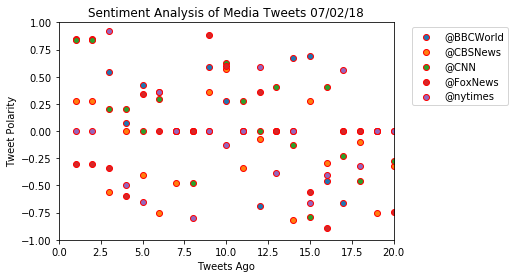

In [4]:
feels = []
for item in sentiment_array:
    [int(x) for x in item ["Tweets Ago"]]
    df = pd.DataFrame(item)
    feels.append(df)
    plt.scatter(item["Tweets Ago"], item["Compound Score"], label = item["Outlet"], edgecolors = "red")
plt.xlim(0,20)
plt.ylim(-1,1)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.title("Sentiment Analysis of Media Tweets %s" % time.strftime("%x"))

results = pd.concat(feels)
results.to_csv("feels.csv")

plt.savefig("Sentiment Analysis.png")
plt.show()

In [5]:
averages_df = pd.DataFrame.from_dict(sentiment_array_average)
averages_df.head

<bound method NDFrame.head of    Compound Score  Negative Score  Neutral Score     Outlet  Positive Score
0       -0.028976         0.10333        0.82393  @BBCWorld         0.07275
1       -0.148847         0.11499        0.83510   @CBSNews         0.04993
2       -0.023359         0.06661        0.87720       @CNN         0.05620
3       -0.027503         0.08519        0.84272   @FoxNews         0.07208
4       -0.053357         0.08166        0.85720   @nytimes         0.06112>

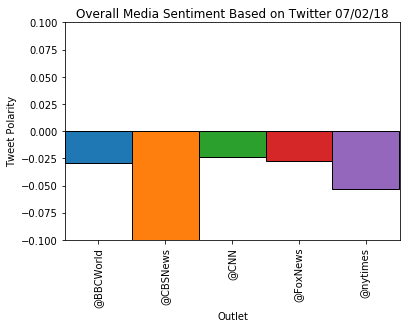

In [6]:
x_axis = range(len(averages_df["Outlet"]))
sent_ch = averages_df.plot(kind='bar', x = "Outlet", y = "Compound Score", stacked=True, edgecolor = "black",
                              linewidth = 1, width=1, legend = None)
plt.ylabel("Tweet Polarity")
plt.title("Overall Media Sentiment Based on Twitter %s" % time.strftime("%x"))
plt.xlim(-.5, len(x_axis)-.49)
plt.ylim(-.1, .1)
plt.savefig("Overall Sentiment.png")
plt.show()